## An Unsupervised Approach for Automatic Activity Recognition based on Hidden Markov Model Regression



## Exemple Gaussian HMM: one sequence

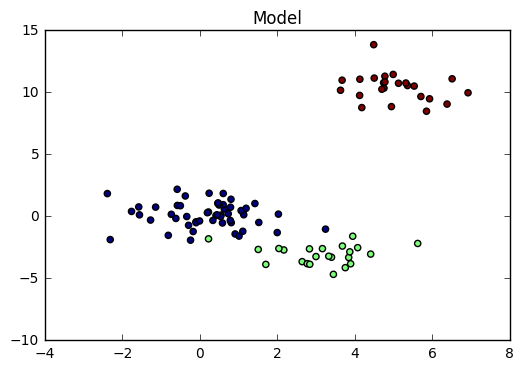

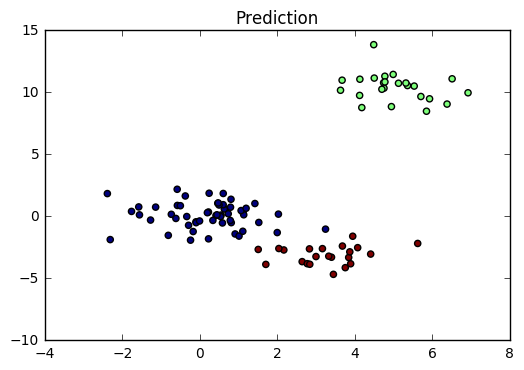

In [16]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
np.random.seed(42)

# Generating variables with known parameter distributions 
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

plt.scatter(X[:,0],X[:,1], c=Z)
plt.title('Model')
plt.show()

# Learning parametres using the dataset
remodel = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
remodel.fit(X)  
Z2 = remodel.predict(X)
plt.scatter(X[:,0],X[:,1], c=Z2)
plt.title('Prediction')
plt.show()

## Exemple Gaussian MHMM: multiple sequences

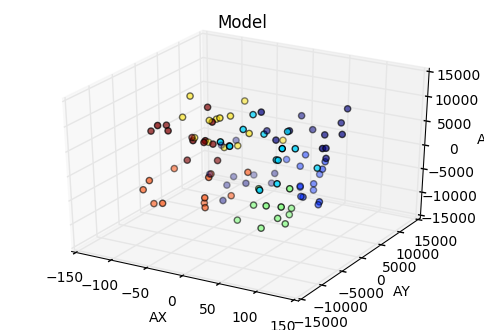

C:\Users\KAIS\Anaconda3\lib\site-packages\hmmlearn\base.py:459: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
C:\Users\KAIS\Anaconda3\lib\site-packages\hmmlearn\base.py:468: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
C:\Users\KAIS\Anaconda3\lib\site-packages\hmmlearn\base.py:451: RuntimeWarning: divide by zero encountered in log
  n_samples, n_components, np.log(self.startprob_),


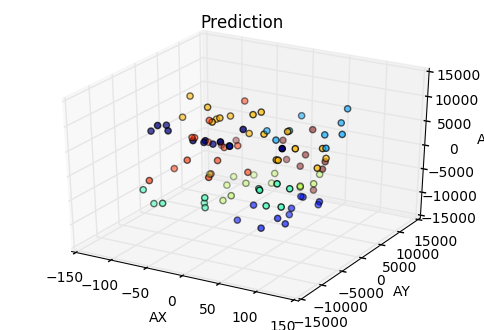

In [17]:
import numpy as np
import random
from hmmlearn import hmm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)

# Generating random variables
# Time
T=[i for i in range(100)]
# Accelertaion X
X=[random.uniform(-100,100) for i in range(100)]
AX=np.array(X)

# Acceleration Y
Y=[100*random.uniform(-100,100) for i in range(100)]
AY=np.array(Y)

# Acceleration Z
Z=[100*random.uniform(-100,100) for i in range(100)]        
AZ=np.array(Z)

# Activités: 8 types
A=[0 for i in range(100)]
for i in range(100):
    if (X[i] > 0) & (Y[i] > 0) & (Z[i] > 0):
        A[i]=0
    elif (X[i] > 0) & (Y[i] > 0) & (Z[i] < 0):
        A[i]=1
    elif (X[i] > 0) & (Y[i] < 0) & (Z[i] > 0):
        A[i]=2
    elif (X[i] > 0) & (Y[i] < 0) & (Z[i] < 0):
        A[i]=3
    elif (X[i] < 0) & (Y[i] > 0) & (Z[i] > 0):
        A[i]=4
    elif (X[i] < 0) & (Y[i] < 0) & (Z[i] < 0):
        A[i]=5
    elif (X[i] < 0) & (Y[i] < 0) & (Z[i] > 0):
        A[i]=6
    elif (X[i] < 0) & (Y[i] < 0) & (Z[i] < 0):
        A[i]=7      
AA=np.array(A) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(AX, AY, AZ,c=AA)
plt.title('Model')
ax.set_xlabel('AX')
ax.set_ylabel('AY')
ax.set_zlabel('AZ')
plt.show()

# Learning parametres using the dataset
remodel = hmm.GaussianHMM(n_components=8, covariance_type="full", n_iter=100000)
M=[[AX[i],AY[i],AZ[i]] for i in range(100)]
AM=np.array(M)
remodel.fit(AM)  
AA2 = remodel.predict(AM)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(AX, AY, AZ,c=AA2)
plt.title('Prediction')
ax.set_xlabel('AX')
ax.set_ylabel('AY')
ax.set_zlabel('AZ')
plt.show()


## Features

In [26]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
%matplotlib inline

names = ['ind', 'ax', 'ay', 'az', 'label']
acc_names = ['ax', 'ay', 'az']
label2str = {1:'Working at Computer', 2:'Standing Up, Walking and Going up-down stairs', 
             3:'Standing', 4:'Walking',5:'Going Up\Down Stairs', 6:'Walking and Talking with Someone', 
             7:'Talking while Standing'}
df = pd.read_csv("Dataset/1.csv", sep=',', names=names)
del df['ind']
df = df[df.label != 0]
df['label_str'] = df.label.apply(lambda x:label2str[x])


# Magnitude
df['mag'] = np.sqrt(np.square(df[acc_names]).sum(axis=1)) 
# Median filter - 3rd ordre
def med_fil(df, names):
    df_r = pd.DataFrame()
    df = df[names]
    for column in df.columns:
        name = column+'_mf'
        df_r[name] = signal.medfilt(df[column].values)
    return df_r
df_med = med_fil(df, acc_names)
# Diffrential
def diffrential(df, names):
    df = df[names]
    df_r = df.diff(periods=1, axis=0).fillna(method='backfill')
    df_r.columns = [names[0]+'_d', names[1]+'_d', names[1]+'_d']
    return df_r
df_diff = diffrential(df, acc_names)
# Low pass filter
def lowpass(df, names):
    df = df[names]
    df_r = pd.DataFrame()
    fs = 52 # frequence sampling is 52
    f_cut = 1 # cutoff frequency
    fs_n = f_cut*2.0/fs # normalized frequency
    b,a = signal.butter(N=3, Wn=fs_n, btype='low')
    for column in df.columns : 
        name = column+'_lp'
        df_r[name] = signal.lfilter(b,a,df[column].values)
    return df_r
df_lp = lowpass(df, acc_names)  
# High pass filter 
def highpass(df, names):
    df = df[names]
    df_r = pd.DataFrame()
    fs = 52 # frequence sampling is 52
    f_cut = 1 # cutoff frequency
    fs_n = f_cut*2.0/fs # normalized frequency
    b,a = signal.butter(N=3, Wn=fs_n, btype='high')
    for column in df.columns : 
        name = column+'_hp'
        df_r[name] = signal.lfilter(b,a,df[column].values)
    return df_r
df_hp = highpass(df, acc_names)

# Total
df = pd.concat([df, df_med, df_diff, df_lp, df_hp], axis=1)
df.head()

ImportError: No module named 'seaborn'

## Première essai sur notre DATA: l'individu 1

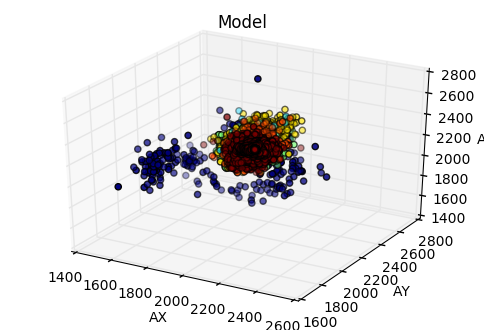

C:\Users\KAIS\Anaconda3\lib\site-packages\hmmlearn\base.py:459: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
C:\Users\KAIS\Anaconda3\lib\site-packages\hmmlearn\base.py:468: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
C:\Users\KAIS\Anaconda3\lib\site-packages\hmmlearn\base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
C:\Users\KAIS\Anaconda3\lib\site-packages\hmmlearn\base.py:469: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
C:\Users\KAIS\Anaconda3\lib\site-packages\hmmlearn\base.py:624: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
C:\Users\KAIS\Anaconda3\lib\site-packages\hmmlearn\base.py:451: RuntimeWarning: divide by zero encountered in log
  n_samples, n_components, np.log(self.startprob_),
C:\Users\KAIS\Anaconda3\lib\site-packages\hmmlearn\base.py:452: RuntimeWarning: divide by zero encountered in log
  np.log(self.tran

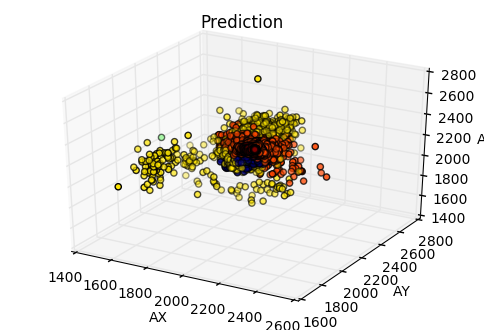

In [18]:
import numpy as np
import random
from hmmlearn import hmm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)

# Uploadinf the data
DATA = np.genfromtxt('1.csv', delimiter = ',')
# Size
L=len(DATA[:,0])
# Time
T=DATA[:,0]
# Acceleration X
AX=DATA[:,1]
# Acceleration Y
AY=DATA[:,2]
# Acceleration Z
AZ=DATA[:,3]
# Acivities: 7 types
AA=DATA[:,4]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(AX, AY, AZ,c=AA)
plt.title('Model')
ax.set_xlabel('AX')
ax.set_ylabel('AY')
ax.set_zlabel('AZ')
plt.show()


# Learning parametres using the dataset
remodel = hmm.GaussianHMM(n_components=7, covariance_type="full", n_iter=100000)
M=[[AX[i],AY[i],AZ[i]] for i in range(L)]
AM=np.array(M)
remodel.fit(AM)  
AA2 = remodel.predict(AM)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(AX, AY, AZ,c=AA2)
plt.title('Prediction')
ax.set_xlabel('AX')
ax.set_ylabel('AY')
ax.set_zlabel('AZ')
plt.show()

In [23]:
# Scores and predictor accuracy
for a in range(7):
    Pr=[0 for i in range(7)]
    print ('Activité ',a+1)
    for i in range(L):
        if AA[i]==a+1:
            Pr[AA2[i]]=Pr[AA2[i]]+1
    print(Pr)

Activité  1
[47, 31556, 0, 1, 194, 1711, 168]
Activité  2
[243, 0, 0, 0, 77, 384, 224]
Activité  3
[1080, 0, 5295, 529, 190, 425, 3660]
Activité  4
[11933, 19, 4, 3, 7118, 7405, 378]
Activité  5
[629, 0, 24, 124, 706, 1684, 24]
Activité  6
[1214, 0, 331, 50, 662, 660, 0]
Activité  7
[6053, 235, 25868, 32992, 202, 3391, 15007]


In [25]:
for i in range(L):
    print(AA[i])
    print(AA2[i])

1.0
3
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
4
1.0
5
1.0
5
1.0
5
1.0
5
1.0
5
1.0
5
1.0
0
1.0
